In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from scipy.interpolate import RectBivariateSpline
from IPython.display import HTML

In [15]:
# SDE parameters | dx = Ax dt + dW

A = np.array([
    [1.0, 0.0],
    [1.0, 1.0],
])

In [16]:
# Time grid

t_min = 0.
t_max = 1.
t_poi = 100

h = (t_max - t_min) / (t_poi - 1)
T = np.linspace(t_min, t_max, t_poi)

In [17]:
# Spatial grid

x_min = -3.
x_max = +3.
x_poi = 10

X = np.linspace(x_min, x_max, x_poi)
X1, X2 = np.meshgrid(X, X)
X = np.array([X1, X2])
X = X.reshape((2, -1))

In [18]:
# Initial condition

x0 = X.copy()
r0 = np.exp(-0.5 * np.diag(x0.T@x0))

In [25]:
def step(x0, r0):
    f = A@x0 # f(x, t)
    g = A    # d f(x, t) / dx
    E = 1.   # \int r_{\eta} d \eta = 1
    e = np.random.randn(*x0.shape)
    x = x0 + h * f + np.sqrt(h) * e
    r = E * r0 * (1. - h * np.trace(g))
    
    # TODO!
    # r_fnc = RectBivariateSpline(x0[0, :], x0[1, :], r)
    # r = r_fnc(*x, grid=False)
    
    return (x, r)

In [26]:
def calc():
    x = x0.copy()
    r = r0.copy()

    X_list = [x]
    R_list = [r]
    
    for _ in range(t_poi-1):
        x, r = step(x, r)
        X_list.append(x)
        R_list.append(r)
    
    return (X_list, R_list)

In [27]:
# Run caclulations

X_list, R_list = calc()

ValueError: x must be strictly increasing

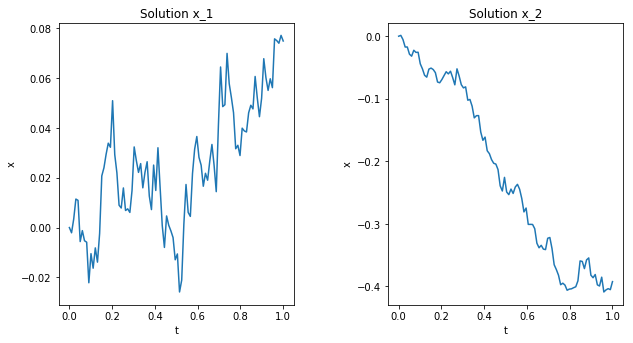

In [28]:
# Plot solution x

fig = plt.figure(figsize=(8, 4))
gs = mpl.gridspec.GridSpec(
    ncols=2, nrows=1, left=0.01, right=0.99, top=0.99, bottom=0.01,
    wspace=0.4, hspace=0.3, width_ratios=[1, 1], height_ratios=[1]
)

ax = fig.add_subplot(gs[0, 0])
ax.plot(T, [np.mean(X[0, :]) for X in X_list], label='x_1')
ax.set_title('Solution x_1')
ax.set_xlabel('t')
ax.set_ylabel('x')

ax = fig.add_subplot(gs[0, 1])
ax.plot(T, [np.mean(X[1, :]) for X in X_list], label='x_2')
ax.set_title('Solution x_2')
ax.set_xlabel('t')
ax.set_ylabel('x')

plt.show()

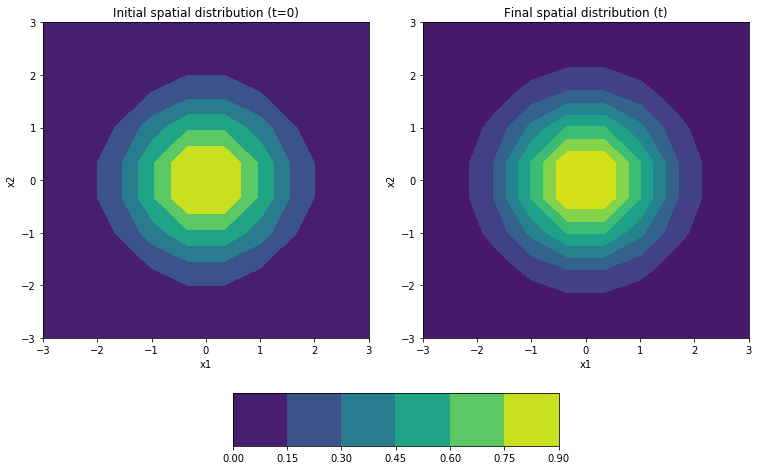

In [29]:
# Plot distribution (initial and final) on spatial grid

fig = plt.figure(figsize=(10, 6))
gs = mpl.gridspec.GridSpec(
    ncols=4, nrows=2, left=0.01, right=0.99, top=0.99, bottom=0.01,
    wspace=0.4, hspace=0.3, width_ratios=[1, 1, 1, 1], height_ratios=[6, 1]
)

ax = fig.add_subplot(gs[0, :2])
ct1 = ax.contourf(X1, X2, R_list[0].reshape((x_poi, x_poi)))
ax.set_title('Initial spatial distribution (t=0)')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax = fig.add_subplot(gs[0, 2:])
ct2 = ax.contourf(X1, X2, R_list[-1].reshape((x_poi, x_poi)))
ax.set_title('Final spatial distribution (t)')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax = fig.add_subplot(gs[1, 1:3])
cb = plt.colorbar(ct1, cax=ax, orientation='horizontal')
# cb.add_lines(ct2)

plt.show()

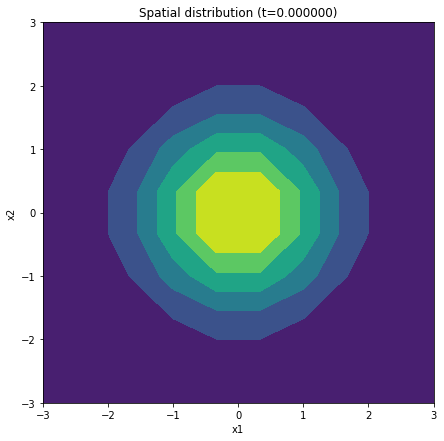

In [30]:
# Build animation for distribution

# Interval between frames
delt = 200 

# Path to ffmpeg executable
plt.rcParams['animation.ffmpeg_path'] = './../tmp/ffmpeg'

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

def run(i):
    t = T[i]
    r = R_list[i].reshape((x_poi, x_poi))

    ax.clear()
    ax.set_title('Spatial distribution (t=%f)'%t)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ct = ax.contourf(X1, X2, r)
    return (ct,)

anim = animation.FuncAnimation(fig, run, frames=len(T), interval=delt, blit=False)
HTML(anim.to_html5_video())